In [1]:
# pip install tensorflow==2.13.0


In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax" # you can also use tensorflow or torch

import keras_cv
import keras
#from keras import ops
import tensorflow as tf

#import cv2|
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import joblib

import matplotlib.pyplot as plt 

2024-03-31 22:52:51.542789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 22:52:51.542888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 22:52:51.672749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using JAX backend.


## TRAIN, TEST AND VALIDATION DATA COLLECTION(FUNDUS_PYTORCH)

In [3]:
import os
import pandas as pd

# Directory containing the images
train_dir = "/kaggle/input/eyepacs-airogs-light/release-raw/release-raw/train"

# List to store the file paths and labels
data = []

# Iterate over the subdirectories 0 and 1
for label, subdir in enumerate(["NRG", "RG"]):
    # Get the full path of the current subdirectory
    subdir_path = os.path.join(train_dir, subdir)
    # Iterate over the files in the subdirectory
    for filename in os.listdir(subdir_path):
        # Check if the file has a .png extension
        if filename.endswith(".jpg"):
            # Create the full path of the file
            file_path = os.path.join(subdir_path, filename)
            # Append the file path and label to the list
            data.append((file_path, label))

# Create a DataFrame from the list of file paths and labels
df_train = pd.DataFrame(data, columns=["file_path", "label"])

# Save the DataFrame to a CSV file
df_train.to_csv("train.csv", index=False)

#####################################################################################################
# Directory containing the images
test_dir = "/kaggle/input/eyepacs-airogs-light/release-raw/release-raw/test"

# List to store the file paths and labels
data = []

# Iterate over the subdirectories 0 and 1
for label, subdir in enumerate(["NRG", "RG"]):
    # Get the full path of the current subdirectory
    subdir_path = os.path.join(test_dir, subdir)
    # Iterate over the files in the subdirectory
    for filename in os.listdir(subdir_path):
        # Check if the file has a .png extension
        if filename.endswith(".jpg"):
            # Create the full path of the file
            file_path = os.path.join(subdir_path, filename)
            # Append the file path and label to the list
            data.append((file_path, label))

# Create a DataFrame from the list of file paths and labels
df_test = pd.DataFrame(data, columns=["file_path", "label"])

# Save the DataFrame to a CSV file
df_test.to_csv("test.csv", index=False)
##########################################################################################

# Directory containing the images
valid_dir = "/kaggle/input/eyepacs-airogs-light/release-raw/release-raw/validation"

# List to store the file paths and labels
data = []

# Iterate over the subdirectories 0 and 1
for label, subdir in enumerate(["NRG", "RG"]):
    # Get the full path of the current subdirectory
    subdir_path = os.path.join(valid_dir, subdir)
    # Iterate over the files in the subdirectory
    for filename in os.listdir(subdir_path):
        # Check if the file has a .png extension
        if filename.endswith(".jpg"):
            # Create the full path of the file
            file_path = os.path.join(subdir_path, filename)
            # Append the file path and label to the list
            data.append((file_path, label))

# Create a DataFrame from the list of file paths and labels
df_valid = pd.DataFrame(data, columns=["file_path", "label"])

# Save the DataFrame to a CSV file
df_valid.to_csv("valid.csv", index=False)


## GLAUCOMA_DATASET

In [4]:


# # Load the CSV file into a DataFrame
# df = pd.read_csv('/kaggle/input/glaucoma-datasets/G1020/G1020.csv')

# # Create a new DataFrame with the image names and labels
# df_train1 = pd.DataFrame({
#     'file_path': ['/kaggle/input/glaucoma-datasets/G1020/Images/' + image_id for image_id in df['imageID']],
#     'label': df['binaryLabels']
# })

# # Display the first few rows of the new DataFrame
# print(df_train1.head())




In [5]:
# df_train1.head(1000)

## ORIGA_DATASET

In [6]:


# # Load the CSV file into a DataFrame
# df = pd.read_csv('/kaggle/input/glaucoma-datasets/ORIGA/OrigaList.csv')

# # Create a new DataFrame with the image names and labels
# df_train2 = pd.DataFrame({
#     'file_path': ['/kaggle/input/glaucoma-datasets/ORIGA/Images/' + image_id for image_id in df['Filename']],
#     'label': df['Glaucoma']
# })

# # Display the first few rows of the new DataFrame
# print(df_train2.head())


### GLUACOMA_OCT_SCANA_ORIGA_DATASET

In [7]:
# import os
# import pandas as pd

# # Directory containing the images
# train_dir = "/kaggle/input/glaucoma-oct-scans-origa-dataset/dataset/dataset"

# # List to store the file paths and labels
# data = []

# # Iterate over the subdirectories 0 and 1
# for label, subdir in enumerate(["yes"], start=1):  # Start from 1
#     # Get the full path of the current subdirectory
#     subdir_path = os.path.join(train_dir, subdir)
#     # Iterate over the files in the subdirectory
#     for filename in os.listdir(subdir_path):
#         # Check if the file has a .png extension
#         if filename.endswith(".jpg"):
#             # Create the full path of the file
#             file_path = os.path.join(subdir_path, filename)
#             # Append the file path and label to the list
#             data.append((file_path, label))

# # Create a DataFrame from the list of file paths and labels
# df_train3 = pd.DataFrame(data, columns=["file_path", "label"])

# # Save the DataFrame to a CSV file
# df_train3.to_csv("train1.csv", index=False)


### G1020_FINAL

In [8]:
# import os
# import pandas as pd

# # Directory containing the images
# train_dir = "/kaggle/input/g1020-final/G1020"

# # List to store the file paths and labels
# data = []

# # Iterate over the subdirectories 0 and 1
# for label, subdir in enumerate(["glucoma"], start=1):  # Start from 1
#     # Get the full path of the current subdirectory
#     subdir_path = os.path.join(train_dir, subdir)
#     # Iterate over the files in the subdirectory
#     for filename in os.listdir(subdir_path):
#         # Check if the file has a .png extension
#         if filename.endswith(".jpg"):
#             # Create the full path of the file
#             file_path = os.path.join(subdir_path, filename)
#             # Append the file path and label to the list
#             data.append((file_path, label))

# # Create a DataFrame from the list of file paths and labels
# df_train4 = pd.DataFrame(data, columns=["file_path", "label"])

# # Save the DataFrame to a CSV file
# df_train4.to_csv("train2.csv", index=False)


### EYEPACS_AIROGS_LIGHT_ DATASET

In [9]:
# import os
# import pandas as pd

# # Directory containing the images
# train_dir = "/kaggle/input/eyepacs-airogs-light/release-raw/release-raw/test"

# # List to store the file paths and labels
# data = []

# # Iterate over the subdirectories 0 and 1
# for label, subdir in enumerate(["RG"], start=1):  # Start from 1
#     # Get the full path of the current subdirectory
#     subdir_path = os.path.join(train_dir, subdir)
#     # Iterate over the files in the subdirectory
#     for filename in os.listdir(subdir_path):
#         # Check if the file has a .png extension
#         if filename.endswith(".jpg"):
#             # Create the full path of the file
#             file_path = os.path.join(subdir_path, filename)
#             # Append the file path and label to the list
#             data.append((file_path, label))

# # Create a DataFrame from the list of file paths and labels
# df_train5 = pd.DataFrame(data, columns=["file_path", "label"])

# # Save the DataFrame to a CSV file
# df_train5.to_csv("train3.csv", index=False)


In [10]:
# import pandas as pd

# # Assuming df_train and df_train1 are already defined

# # Stack the dataframes
# df_train = pd.concat([df_train, df_train1, df_train2, df_train3, df_train4, df_train5], ignore_index=True)

# # Display the first few rows of the new DataFrame
# print(df_train.head())


In [11]:
df_train.label.value_counts()

label
0    2500
1    2500
Name: count, dtype: int64

## RESIZING THE IMAGES

In [12]:
# import cv2
# # Create a new directory in /kaggle/working/
# new_directory = '/kaggle/working/resized_images'
# os.makedirs(new_directory, exist_ok=True)

# # Initialize a list to store the resized file paths
# resized_file_paths = []

# # Loop through each row in df_train
# for index, row in df_train.iterrows():
#     # Load the image
#     image = cv2.imread(row['file_path'])
#     # Check if the image is None
#     if image is None:
#         print(f"Failed to read image: {row['file_path']}")
#     else:
#         # Resize the image to 512x512
#         resized_image = cv2.resize(image, (512, 512))
#         # Generate a new file path for the resized image
#         resized_file_path = f'{new_directory}/{row["file_path"].split("/")[-1][:-4]}_resized.png'
#         # Save the resized image to the new file path
#         cv2.imwrite(resized_file_path, resized_image)
#         # Append the new file path to the list
#         resized_file_paths.append(resized_file_path)

# # Update the 'file_path' column in df_train with the new file paths
# df_train['file_path'] = resized_file_paths

# # Print the first few rows of df_train to verify the changes
# print(df_train.head())

In [13]:
df_train.label.value_counts()

label
0    2500
1    2500
Name: count, dtype: int64

### IMAGE SIZE CHECK

In [14]:
# import os
# import cv2

# # Path to the directory where the resized images are saved
# resized_images_directory = '/kaggle/working/resized_images'

# # Get the list of files in the directory
# image_files = os.listdir(resized_images_directory)

# # Initialize a list to store the image sizes
# image_sizes = []

# # Loop through each image file
# for image_file in image_files:
#     # Construct the full file path
#     file_path = os.path.join(resized_images_directory, image_file)
#     # Read the image
#     image = cv2.imread(file_path)
#     # Get the image size
#     image_size = image.shape[:2]
#     # Append the image size to the list
#     image_sizes.append((image_file, image_size))

# # Print the image sizes
# for image_file, image_size in image_sizes:
#     print(f"Image: {image_file}, Size: {image_size}")


## REGION OF INTEREST EXTRACTION

In [15]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the image
# image_path = df_train["file_path"].sample().values[0]
# image = cv2.imread(image_path)

# # Convert the image to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur
# blurred_image = cv2.GaussianBlur(gray_image, (65, 65), 0)

# # Find the pixel with the highest intensity value
# max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)

# # Define the radius for the circle
# radius = 6 // 2

# # Get the x and y coordinates for cropping the image
# x = max_intensity_pixel[1] - radius
# y = max_intensity_pixel[0] - radius

# # Crop the image
# roi_image = image[y:y+512, x:x+512]

# # Plot the original image and the extracted ROI
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
# plt.title('Extracted ROI')
# plt.axis('off')

# plt.show()


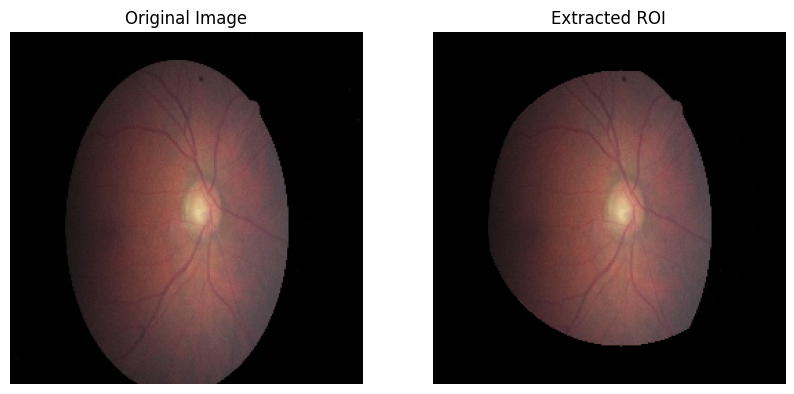

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = df_train["file_path"].sample().values[0]
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (65, 65), 0)

# Find the pixel with the highest intensity value
max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)

# Define the radius for the circle
radius = 200 // 2

# Get the x and y coordinates for cropping the image
x = max_intensity_pixel[1] - radius
y = max_intensity_pixel[0] - radius

# Create a mask for the circle
mask = np.zeros_like(image)
cv2.circle(mask, (x + radius, y + radius), radius, (255, 255, 255), -1)

# Apply the mask to the original image
roi_image = cv2.bitwise_and(image, mask)

# Plot the original image and the extracted ROI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
plt.title('Extracted ROI')
plt.axis('off')

plt.show()



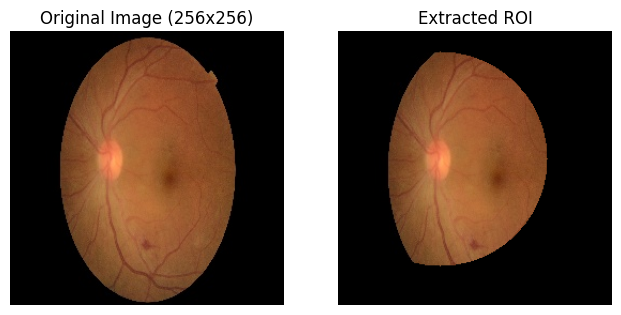

In [17]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = df_train["file_path"].sample().values[0]

# Check the file extension
file_extension = os.path.splitext(image_path)[1]

# Load the image based on the file extension
if file_extension.lower() == '.png':
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
else:
    image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (65, 65), 0)

# Find the pixel with the highest intensity value
max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)

# Define the radius for the circle
radius = 200 // 2

# Get the x and y coordinates for cropping the image
x = max_intensity_pixel[1] - radius
y = max_intensity_pixel[0] - radius

# Create a mask for the circle
mask = np.zeros_like(image)
cv2.circle(mask, (x + radius, y + radius), radius, (255, 255, 255), -1)

# Apply the mask to the original image
roi_image = cv2.bitwise_and(image, mask)

# Get the size of the original image
original_height, original_width, _ = image.shape

# Plot the original image and the extracted ROI
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image ({}x{})'.format(original_width, original_height))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
plt.title('Extracted ROI')
plt.axis('off')

plt.show()


## PERFORM ROI ON THE DATA

In [18]:
# import cv2
# import numpy as np
# import os
# import pandas as pd

# def extract_rois_and_labels(df, output_dir):
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Initialize an empty list to store the rows of the DataFrame
#     roi_rows = []
    
#     for index, row in df.iterrows():
#         # Load the image
#         image = cv2.imread(row['file_path'])
        
#         # Convert the image to grayscale
#         gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
#         # Apply Gaussian blur
#         blurred_image = cv2.GaussianBlur(gray_image, (65, 65), 0)
        
#         # Find the pixel with the highest intensity value
#         max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)
        
#         # Define the radius for the circle
#         radius = 200 // 2
        
#         # Get the x and y coordinates for cropping the image
#         x = max_intensity_pixel[1] - radius
#         y = max_intensity_pixel[0] - radius
        
#         # Create a mask for the circle
#         mask = np.zeros_like(image)
#         cv2.circle(mask, (x + radius, y + radius), radius, (255, 255, 255), -1)
        
#         # Apply the mask to the original image
#         roi_image = cv2.bitwise_and(image, mask)
        
#         # Split the green channel
#         green_channel = roi_image[:, :, 1]
#         # Apply histogram equalization
#         clahe_op = cv2.createCLAHE(clipLimit=2)
#         roi_image = clahe_op.apply(green_channel)
        
#         # Save the ROI image
#         roi_filename = os.path.basename(row['file_path']).split('.')[0] + '_roi.jpg'
#         roi_path = os.path.join(output_dir, roi_filename)
#         cv2.imwrite(roi_path, roi_image)
        
#         # Append the row to the list
#         roi_rows.append({'roi_path': roi_path, 'label': row['label']})
    
#     # Create a DataFrame from the list of rows
#     roi_df = pd.DataFrame(roi_rows)
    
#     return roi_df




###### PROCESSOR INTENSIVE CODE

### PERFORM RESIZING , ROI AND GRAYSCALING

In [19]:
import cv2
import numpy as np
import os
import pandas as pd

def extract_rois_and_labels(df, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize an empty list to store the rows of the DataFrame
    roi_rows = []
    
    for index, row in df.iterrows():
        # Load the image
        image = cv2.imread(row['file_path'])
        
        # Resize the image to 512x512
        resized_image = cv2.resize(image, (512, 512))
        
#         # Convert the resized image to grayscale
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        
        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(resized_image , (65, 65), 0)
        
        # Find the pixel with the highest intensity value
        max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)
        
        # Define the radius for the circle
        radius = 250 // 2
        
        # Get the x and y coordinates for cropping the image
        x = max_intensity_pixel[1] - radius
        y = max_intensity_pixel[0] - radius
        
        # Create a mask for the circle
        mask = np.zeros_like(resized_image)
        cv2.circle(mask, (x + radius, y + radius), radius, (255, 255, 255), -1)
        
        # Apply the mask to the resized image
        roi_image = cv2.bitwise_and(resized_image, mask)
        
#         # Split the green channel
        green_channel = roi_image[:, :, 1]
        # Apply histogram equalization
        clahe_op = cv2.createCLAHE(clipLimit=2)
        roi_image = clahe_op.apply(green_channel)
        
        # Save the ROI image
        roi_filename = os.path.basename(row['file_path']).split('.')[0] + '_roi.jpg'
        roi_path = os.path.join(output_dir, roi_filename)
        cv2.imwrite(roi_path, roi_image)
        
        # Append the row to the list
        roi_rows.append({'roi_path': roi_path, 'label': row['label']})
    
    # Create a DataFrame from the list of rows
    roi_df = pd.DataFrame(roi_rows)
    
    return roi_df


In [20]:
# Extract ROIs and labels for the training images
train_roi_df = extract_rois_and_labels(df_train, 'train_roi_images')

# Extract ROIs and labels for the testing images
test_roi_df = extract_rois_and_labels(df_test, 'test_roi_images')

# Extract ROIs and labels for the validation images
valid_roi_df = extract_rois_and_labels(df_valid, 'valid_roi_images')

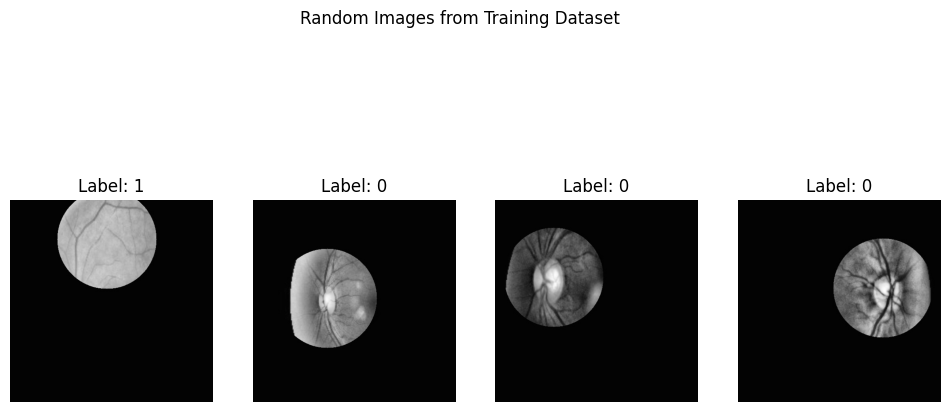

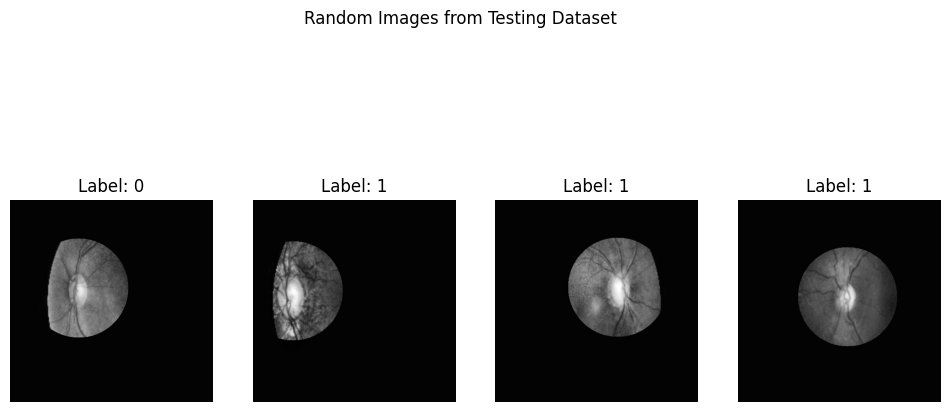

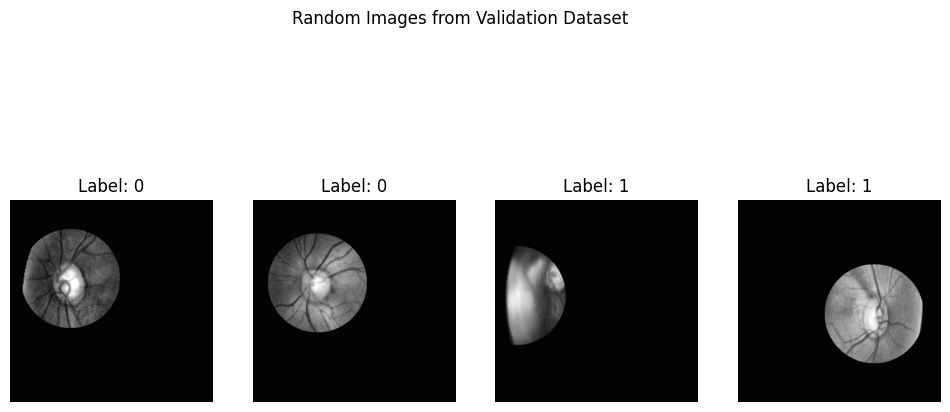

In [21]:
import matplotlib.pyplot as plt
import random

def plot_random_images(df, title):
    # Get a random sample of images from the DataFrame
    random_indices = random.sample(range(len(df)), min(len(df), 4))
    random_images = [cv2.imread(df.iloc[i]['roi_path']) for i in random_indices]
    
    # Create a plot to display the random images
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)
    
    for i, image in enumerate(random_images):
        plt.subplot(1, 4, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Label: {}'.format(df.iloc[random_indices[i]]['label']))
    
    plt.show()

# Plot random images from the training dataset
plot_random_images(train_roi_df, 'Random Images from Training Dataset')

# Plot random images from the testing dataset
plot_random_images(test_roi_df, 'Random Images from Testing Dataset')

# Plot random images from the validation dataset
plot_random_images(valid_roi_df, 'Random Images from Validation Dataset')


In [22]:
def image_cvt_histeq(df, target_path):
    # Create the target directory if it doesn't exist
    if not os.path.exists(target_path):
        os.makedirs(target_path)

    new_df = pd.DataFrame(columns=['file_path', 'label'])

    for index, row in df.iterrows():
        # Load the image
        img = cv2.imread(row['file_path'])
        # Split the green channel
        green_channel = img[:, :, 1]
        # Apply histogram equalization
        clahe_op = cv2.createCLAHE(clipLimit=2)
        final_img = clahe_op.apply(green_channel)
        # Save the image
        cv2.imwrite(os.path.join(target_path, f'{index}.png'), final_img)
        # Add the new file path and label to the new DataFrame
        new_df = new_df.append({'file_path': os.path.join(target_path, f'{index}.png'), 'label': row['label']}, ignore_index=True)

    return new_df


###### PLOT OF THE NEW DATAFRAMES

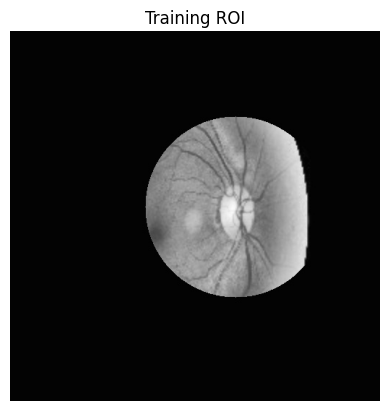

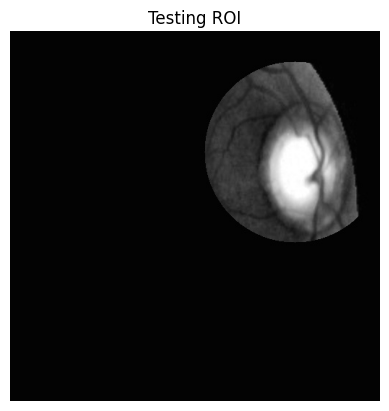

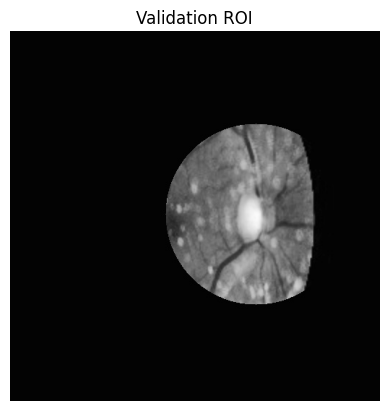

In [23]:
import matplotlib.pyplot as plt
import random

# Function to plot a random image from a DataFrame
def plot_random_image(df, title):
    # Get a random row from the DataFrame-
    random_row = df.sample()
    
    # Load the image
    image_path = random_row['roi_path'].values[0]
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot a random image from each DataFrame
plot_random_image(train_roi_df, 'Training ROI')
plot_random_image(test_roi_df, 'Testing ROI')
plot_random_image(valid_roi_df, 'Validation ROI')


In [24]:
train_roi_df.label.count()

5000

# DATA PREPROCESSING

In [25]:

# Convert the label column to strings
train_roi_df["label"] = train_roi_df["label"].astype(str)
test_roi_df["label"] = test_roi_df["label"].astype(str)
valid_roi_df["label"] = valid_roi_df["label"].astype(str)

In [26]:
test_roi_df.label.value_counts()

label
0    500
1    500
Name: count, dtype: int64

In [27]:
train_roi_df["label"].value_counts()

label
0    2500
1    2500
Name: count, dtype: int64

In [28]:
def custom_preprocessing(image):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred_image = cv2.GaussianBlur(gray_image, (65, 65), 0)

        # Find the pixel with the highest intensity value
        max_intensity_pixel = np.unravel_index(np.argmax(blurred_image), blurred_image.shape)

        # Define the radius for the circle
        radius = 200 // 2

        # Get the x and y coordinates for cropping the image
        x = max_intensity_pixel[1] - radius
        y = max_intensity_pixel[0] - radius

        # Create a mask for the circle
        mask = np.zeros_like(image)
        cv2.circle(mask, (x + radius, y + radius), radius, (255, 255, 255), -1)

        # Apply the mask to the original image
        roi_image = cv2.bitwise_and(image, mask)

        # Split the green channel
        green_channel = roi_image[:, :, 1]
        # Apply histogram equalization
        clahe_op = cv2.createCLAHE(clipLimit=2)
        roi_image = clahe_op.apply(green_channel)

        return roi_image


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    
)

# Define the data generator for validation images
valid_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32

# Create the training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_roi_df,
    x_col='roi_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Create the validation data generator
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_roi_df,
    x_col='roi_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
)

# Define the data generator for test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_roi_df,
    x_col='roi_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
)


# Define the data generator for test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_roi_df,
    x_col='roi_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
)

Found 5000 validated image filenames belonging to 2 classes.
Found 540 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


## BUILDING U_NET ARCHITECTURE

In [30]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.metrics import AUC

# def build_unet_model(input_shape):
#     inputs = tf.keras.Input(shape=input_shape)
    
#     # Encoder
#     conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
#     conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
#     pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
#     conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
#     conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
#     pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
#     # Bottleneck
#     conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
#     conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
#     # Decoder
#     up4 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv3)
#     merge4 = layers.concatenate([conv2, up4], axis=3)
#     conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge4)
#     conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
#     up5 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv4)
#     merge5 = layers.concatenate([conv1, up5], axis=3)
#     conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge5)
#     conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
#     # Output
#     outputs = layers.Dense(1, activation='sigmoid')(conv5)

    
#     model = tf.keras.Model(inputs=inputs, outputs=outputs, name="U-Net")
    
#     return model

# # Create the U-Net model
# unet_model = build_unet_model(input_shape=(256, 256, 3))

# # Compile the model with SGD optimizer
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# unet_model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=[AUC()],)

In [31]:
# unet_model.summary()

In [32]:
# tf.keras.utils.plot_model(unet_model, show_shapes=True)

### BUILDING NORMAL CNN ARCHITECTURE

## HIGHEST ACCURACY

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.15.0'

In [35]:
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import Loss

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(218, activation='relu'),
    Dense(1, activation='sigmoid')
])
# NO DROPOUT LAYER FOR 0.83

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, #LEARNING RATE TO 0.01 FOR 0.83
                                        momentum=0.9)
# unet_model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=[AUC()],)


# class FocalLoss(Loss):
#     def __init__(self, alpha=0.65, gamma=2.0):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def call(self, y_true, y_pred):
#         # Calculate binary cross-entropy loss
#         bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=True)

#         # Calculate focal loss
#         pt = tf.exp(-bce_loss)
#         focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss

#         # Calculate class weights
#         class_weights = tf.constant([1.0, 1.0])  # Initialize with equal weights
#         total_samples = tf.reduce_sum(y_true)
#         class_weights = total_samples / (2.0 * tf.reduce_sum(y_true, axis=0))

#         # Apply class weights to the focal loss
#         focal_loss = focal_loss * class_weights

#         return focal_loss


model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['binary_accuracy',keras.metrics.AUC(),keras.metrics.Precision(), keras.metrics.Recall()])

# # Compile the model
# model.compile(optimizer=sgd_optimizer,
#               loss=FocalLoss(),
#               metrics=[AUC()])

#CHANGE TO AUC FOR 0.83

In [36]:
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import Loss

# model = Sequential([
#     Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
# #     Conv2D(128, (3, 3), activation='relu'),
# #     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
# # NO DROPOUT LAYER FOR 0.83

# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, #LEARNING RATE TO 0.01 FOR 0.83
#                                         momentum=0.9)
# # unet_model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=[AUC()],)


# class FocalLoss(Loss):
#     def __init__(self, alpha=0.65, gamma=2.0):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def call(self, y_true, y_pred):
#         # Calculate binary cross-entropy loss
#         bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=True)

#         # Calculate focal loss
#         pt = tf.exp(-bce_loss)
#         focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss

#         # Calculate class weights
#         class_weights = tf.constant([1.0, 1.0])  # Initialize with equal weights
#         total_samples = tf.reduce_sum(y_true)
#         class_weights = total_samples / (2.0 * tf.reduce_sum(y_true, axis=0))

#         # Apply class weights to the focal loss
#         focal_loss = focal_loss * class_weights

#         return focal_loss


# model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['binary_accuracy',keras.metrics.AUC(),keras.metrics.Precision(), keras.metrics.Recall()])

# # # Compile the model
# # model.compile(optimizer=sgd_optimizer,
# #               loss=FocalLoss(),
# #               metrics=[AUC()])

#CHANGE TO AUC FOR 0.83

#### IMAGE NET

In [37]:
import pandas as pd
from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from keras.layers import SpatialDropout2D, Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Conv2D, BatchNormalization, MaxPooling2D, Input, Concatenate, ReLU, AveragePooling2D, UpSampling2D
from tensorflow.keras.applications import DenseNet201, InceptionResNetV2, MobileNetV2, EfficientNetB3, Xception, VGG19, InceptionV3, EfficientNetB0, EfficientNetB2, Xception
from tensorflow.keras import regularizers, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import Sequence
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import keras
import numpy as np
import random
import shutil

In [38]:
from tensorflow.keras.applications import densenet
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow_addons.metrics import CohenKappa, F1Score
from tensorflow.keras.metrics import F1Score
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
from tensorflow.keras.applications.densenet import DenseNet201

In [39]:
# from keras.layers import GlobalMaxPool2D
# target = 256
# # simple model that uses mobilenet background
# def getModel(image_size, num_classes):
#     model_input = keras.Input(shape=(image_size, image_size, 3))
    
#     transfer = keras.applications.MobileNetV3Large(
#         weights='imagenet', include_top=False, input_tensor=model_input
#     )
#     x = transfer.get_layer(index=142).output
    
#     x = SpatialDropout2D(0.15)(x)
#     x = Conv2D(filters=64, kernel_size=1, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-1))(x)
#     x = GlobalMaxPool2D()(x)
#     x = Dropout(0.15)(x)

#     model_output = Dense(1, activation='sigmoid') (x)

#     return keras.Model(inputs=model_input, outputs=model_output)

# model = getModel(image_size=target, num_classes=1)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.85, patience=2, min_lr=1e-5) # factor=0.85
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath='val-best.h5',
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True)

In [40]:
TARGET_SIZE = (256, 256)
BATCH_SIZE = 16
ROOT_DIRECTORY = '/kaggle/input/fundus-pytorch'
LR = 0.0001
epochs = 20
fine_tuning_epochs = 20
total_epochs = epochs + fine_tuning_epochs

In [41]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    print("Building model...\n")
    base_model = DenseNet201(include_top = False, weights = 'imagenet', input_shape = TARGET_SIZE + (3,))

    base_model.trainable = False

    model = tf.keras.Sequential()

    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(8, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    
    print("Finished!\n")

    model.summary()

    metrics = [
        tf.keras.metrics.TruePositives(name = 'tp'),
        tf.keras.metrics.TrueNegatives(name = 'tn'),
        tf.keras.metrics.FalsePositives(name = 'fp'),
        tf.keras.metrics.FalseNegatives(name = 'fn'),
        tf.keras.metrics.BinaryAccuracy(name = 'acc'),
        tf.keras.metrics.Recall(name = 'r'),
        tf.keras.metrics.Precision(name = 'p'),
#         F1Score(threshold = 0.5, average='micro', name = 'F1'),
#         CohenKappa(num_classes = 2, name = 'Kappa')
    ]

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(factor = 0.3)]
    
    print("Compiling...\n")
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = LR), 
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics = metrics,
    )
    print("Finished!\n")
    
    print("Fitting...\n")
    history_fit = model.fit(
        train_generator, 
        validation_data = valid_generator,
        batch_size = BATCH_SIZE, 
        epochs = epochs, 
        verbose = 1, 
        callbacks = callbacks,
        shuffle = True,
        initial_epoch = 0,
    )
    print("Finished!\n")
    model_1= model
    
    print("Initing fine-tuning...\n")
    #fine tuning
    base_model.trainable = True
    
    for layer in base_model.layers[:200]:
        layer.trainable = False

    model.summary()

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = LR / 10), 
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics = metrics,
    )
    
    print("Fitting...\n")
    history_fine_tuning = model.fit(
        train_generator, 
        validation_data = valid_generator,
        batch_size = BATCH_SIZE, 
        epochs = total_epochs, 
        verbose = 1, 
        callbacks = callbacks,
        shuffle = True,
        initial_epoch = fine_tuning_epochs,
    )
    model_2= model
    
    print("Finished!\n")

Building model...

74836368/74836368 [==============================] - 1s 0us/step
Finished!

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               245888    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)         

I0000 00:00:1711925812.444988     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 56s 210ms/step - loss: 0.6581 - tp: 1453.0000 - tn: 1585.0000 - fp: 915.0000 - fn: 1047.0000 - acc: 0.6076 - r: 0.5812 - p: 0.6136 - val_loss: 0.6168 - val_tp: 168.0000 - val_tn: 190.0000 - val_fp: 80.0000 - val_fn: 102.0000 - val_acc: 0.6630 - val_r: 0.6222 - val_p: 0.6774 - lr: 1.0000e-04
Epoch 2/20
157/157 [==============================] - 20s 127ms/step - loss: 0.6100 - tp: 1706.0000 - tn: 1662.0000 - fp: 838.0000 - fn: 794.0000 - acc: 0.6736 - r: 0.6824 - p: 0.6706 - val_loss: 0.5965 - val_tp: 158.0000 - val_tn: 209.0000 - val_fp: 61.0000 - val_fn: 112.0000 - val_acc: 0.6796 - val_r: 0.5852 - val_p: 0.7215 - lr: 1.0000e-04
Epoch 3/20
157/157 [==============================] - 20s 126ms/step - loss: 0.5828 - tp: 1815.0000 - tn: 1679.0000 - fp: 821.0000 - fn: 685.0000 - acc: 0.6988 - r: 0.7260 - p: 0.6885 - val_loss: 0.5732 - val_tp: 205.0000 - val_tn: 173.0000 - val_fp: 97.0000 - val_fn: 65.0000 - val_acc: 0.7000 - val_r: 0.7593 - val_p: 

In [42]:
model.save("model_g.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               245888    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                      

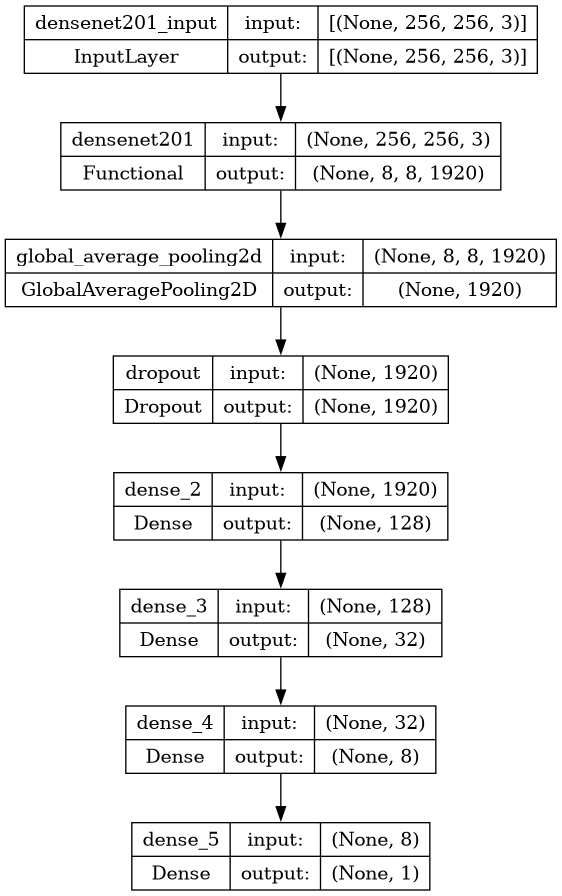

In [46]:
tf.keras.utils.plot_model(model, show_shapes=True)
import tensorflow as tf

# Define your model here

# Assuming 'model' is your TensorFlow Keras model

# Plot the model architecture with shapes
tf.keras.utils.plot_model(model_2, to_file='model_architecture.png', show_shapes=True)


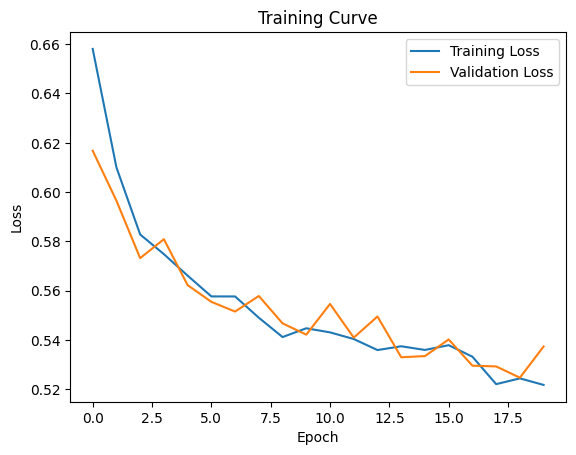

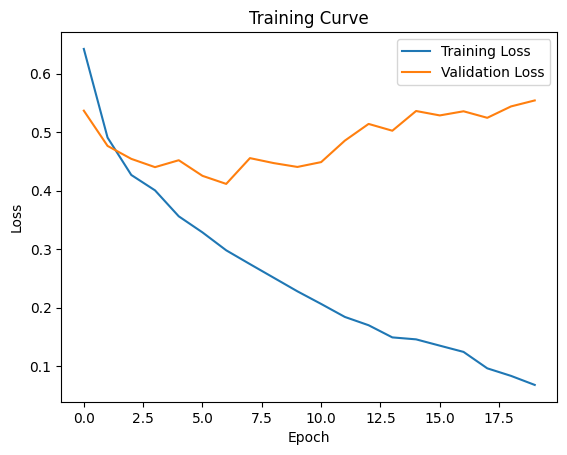

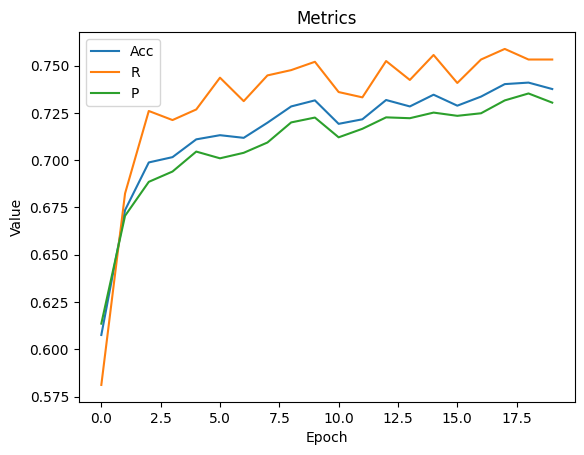

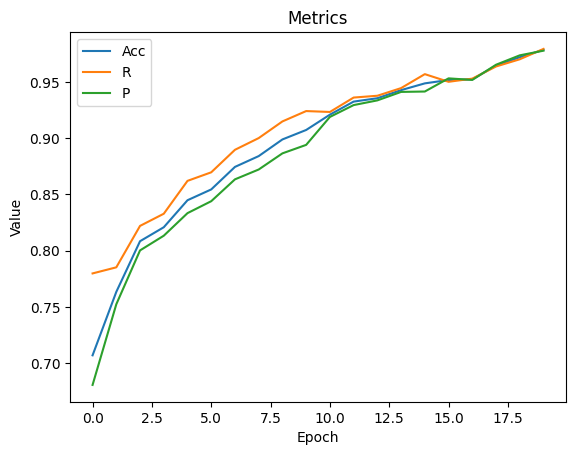

In [58]:
import matplotlib.pyplot as plt

# Plotting the training curve
def plot_training_curve(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plotting various metrics
def plot_metrics(history):
    metrics = ['acc', 'r', 'p']  # Select metrics to plot (e.g., accuracy, recall, precision)
    for metric in metrics:
        plt.plot(history.history[metric], label=metric.capitalize())
    plt.title('Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plotting the training curve for feature extraction phase
plot_training_curve(history_fit)

# Plotting the training curve for fine-tuning phase
plot_training_curve(history_fine_tuning)

# Plotting various metrics for feature extraction phase
plot_metrics(history_fit)

# Plotting various metrics for fine-tuning phase
plot_metrics(history_fine_tuning)


In [ ]:

# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-3)






###### DEALING WITH CLASS IMBALANCE AND OVER FITTING

In [ ]:
# # Train the model with callbacks
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=10,
#     validation_data=valid_generator,
#     validation_steps=len(valid_generator),
#     shuffle=True,
#     callbacks=[ reduce_lr])

# MODEL EVALUATION

In [51]:
# Evaluate the model on the test set
test_loss, test_acc,_,i,a,b,o,a = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_acc}")

32/32 [==============================] - 4s 109ms/step - loss: 0.5189 - tp: 408.0000 - tn: 412.0000 - fp: 88.0000 - fn: 92.0000 - acc: 0.8200 - r: 0.8160 - p: 0.8226
Test accuracy: 408.0


In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and AUC scores from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['auc_']
val_auc = history.history['val_auc_5']

# Create a plot of the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Create a plot of the training and validation AUC scores
plt.subplot(1, 2, 2)
plt.plot(train_auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()

plt.show()


32/32 [==============================] - 7s 100ms/step


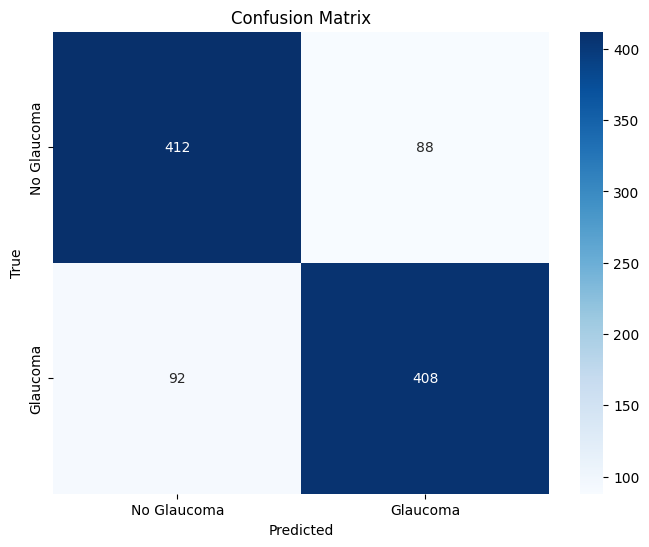

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)

# Convert the predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Glaucoma', 'Glaucoma'], yticklabels=['No Glaucoma', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


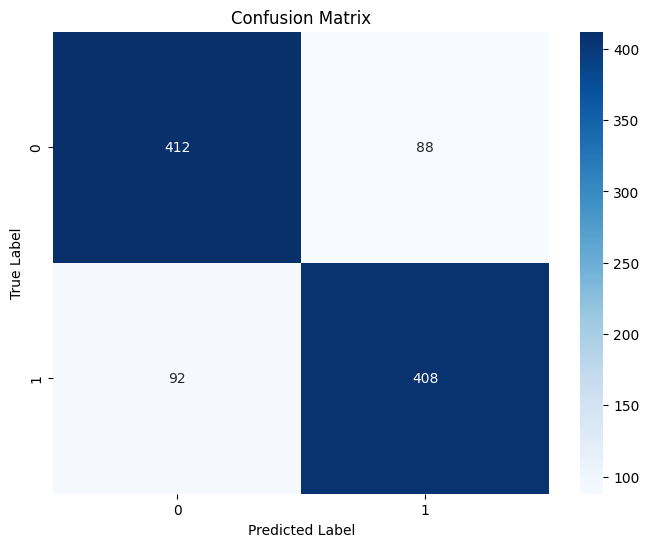

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


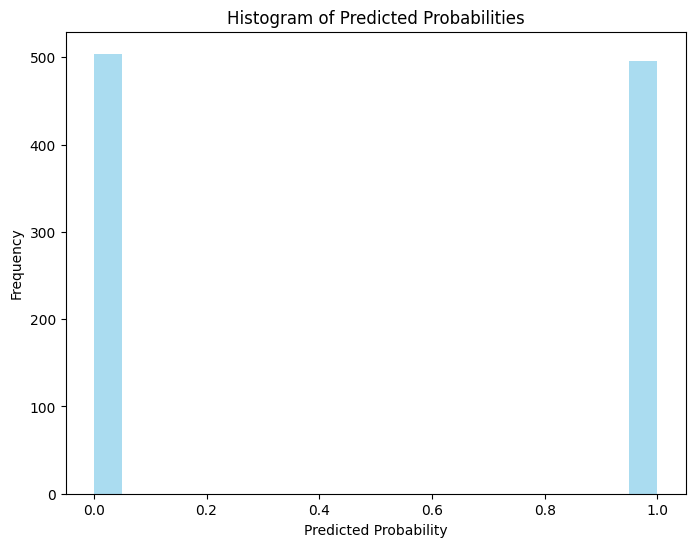

In [54]:
# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_binary, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


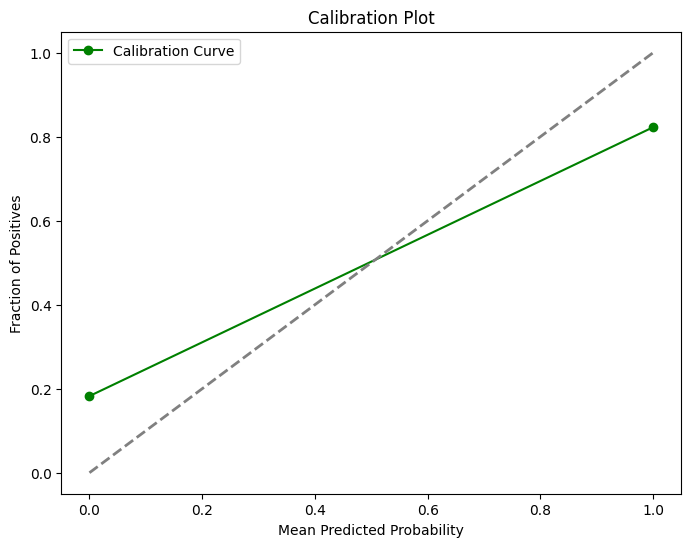

In [55]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_true, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', color='green', label='Calibration Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend(loc='upper left')
plt.show()


In [56]:
# from sklearn.metrics import plot_cumulative_gain

# # Plot cumulative gain curve
# plt.figure(figsize=(8, 6))
# plot_cumulative_gain(y_true, y_pred_binary)
# plt.xlabel('Percentage of Samples')
# plt.ylabel('Gain')
# plt.title('Cumulative Gain Curve')
# plt.show()


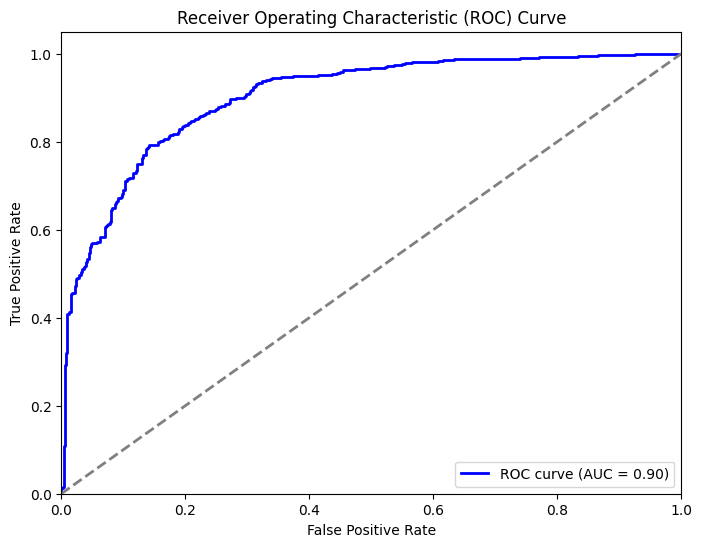

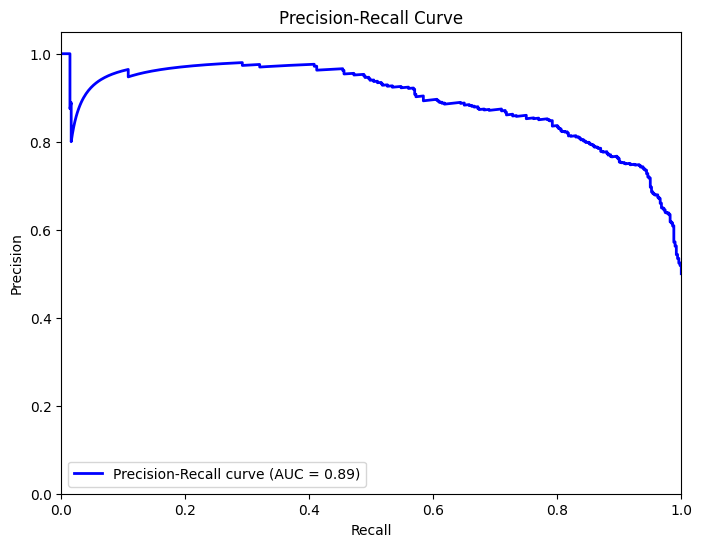

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Calculate the area under the precision-recall curve (AUC)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# SAVE MODEL

In [ ]:
# import kagglehub

# # Other ways to authenticate also available: https://github.com/Kaggle/kagglehub?tab=readme-ov-file#authenticate
# kagglehub.login() 



In [ ]:
# # For PyTorch framework & `2b` variation.
# # Replace the framework with "jax", "other" based on which framework you are uploading to.
# kagglehub.model_upload('google/gemm/pyTorch/2b', 'path/to/local/model/files', 'Apache 2.0')

In [ ]:
model.save('GLAUCOMA_DETECTION.h5')

In [ ]:
model.save('GLAUCOMA_DETECTION.keras')

In [ ]:
# from IPython.display import HTML

# # Define the file path
# model_file_path = '/kaggle/working/GLAUCOMA_DETECTION.keras'

# # Generate HTML code for download link
# download_link = f'<a href="{model_file_path}" download>Click here to download the model file</a>'

# # Display the download link
# HTML(download_link)


# 

In [ ]:
# from huggingface_hub import login
# login()

In [ ]:
# from transformers import PushToHubCallback

# push_to_hub_callback = PushToHubCallback(
#     output_dir="/kaggle/working/GLAUCOMA_DETECTION.keras", hub_model_id="Glaucoma_model_keras"
# )

In [ ]:
# from transformers import PushToHubCallback

# push_to_hub_callback = PushToHubCallback(
#     output_dir="./your_model_save_path", tokenizer=tokenizer, hub_model_id="your-username/my-awesome-model"
# )